In [14]:
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
import os
import matplotlib.pyplot as plt
import cv2
import numpy as np

train_dir = 'C:/Users/rgmc2/Training_FER/train/Disgust/'
val_dir = 'C:/Users/rgmc2/Training_FER/validation/Disgust'


        
                

In [29]:
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg19 import VGG19
from keras.layers import Flatten, Dense, Dropout, Conv2D, MaxPool2D,BatchNormalization, LSTM, CuDNNLSTM, MaxPooling2D
from keras.models import Sequential
from keras import regularizers
import keras

from keras.layers import TimeDistributed
from keras.layers import GlobalAveragePooling2D
from tensorflow.keras.applications import MobileNetV2

from tensorflow.keras.optimizers import Adam
import tensorflow as tf

import matplotlib.pyplot as plt
import cv2

 

train_dir = 'C:/Users/rgmc2/Training_FER/train'
val_dir = 'C:/Users/rgmc2/Training_FER/validation'


image_generator = ImageDataGenerator(
    rescale=1./255, 
    horizontal_flip=2, 
    vertical_flip=2
)    

training_set = image_generator.flow_from_directory(batch_size=256,
                                                 directory=train_dir,
                                                 shuffle=True,
                                                 target_size=(48, 48), 
                                                 class_mode='categorical',
#                                                  color_mode = "grayscale"
                                                )
testing_set = image_generator.flow_from_directory(batch_size=128,
                                                 directory=val_dir,
                                                 shuffle=True,
                                                 target_size=(48, 48), 
                                                 class_mode='categorical',
#                                                  color_mode = "grayscale"
                                                 )


training_set.class_indices
emotion_dict = {0: "Angry", 1: "Disgust", 2: "Fear", 3: "Happy", 4: "Neutral", 5: "Sad", 6: "Surprise"}     

Found 28792 images belonging to 7 classes.
Found 3973 images belonging to 7 classes.


In [16]:

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(48, 48,3)))
model.add(Conv2D(64,(3,3), padding='same', activation='relu' ))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(5,5), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
    
model.add(Conv2D(512,(3,3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(512,(3,3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten()) 
model.add(Dense(256,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
    
model.add(Dense(512,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(7, activation='softmax'))

model.compile(
    optimizer = "adam", 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
  )

In [17]:
hist = model.fit(training_set, validation_data = testing_set , epochs = 5)

Epoch 1/5
  1/113 [..............................] - ETA: 23:24 - loss: 10.0358 - accuracy: 0.1562

KeyboardInterrupt: 

In [18]:
    hist = hist.history

NameError: name 'hist' is not defined

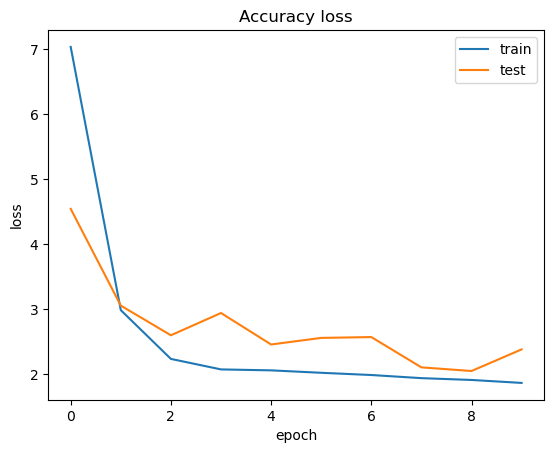

In [20]:
plt.plot(hist["loss"])
plt.plot(hist["val_loss"])
plt.title("Accuracy loss")
plt.legend(["train","test"])
plt.xlabel("epoch")
plt.ylabel("loss")
plt.savefig("CNNv2_loss.png")

In [21]:
model.save("CNNv2.h5")

In [6]:
model=tf.keras.models.load_model('CNNv2.h5')

#uploading test image to test our trained model


In [5]:
plt.plot(hist["accuracy"])
plt.plot(hist["val_accuracy"])
plt.title("Accuracy plot")
plt.legend(["train","test"])
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.savefig("CNNv2_accuracy.png")

NameError: name 'hist' is not defined

In [87]:
test_image=cv2.imread("C:/Users/rgmc2/Pictures/source/angry/angry_1.jpeg") 

#We need to detect only face and apply the trained model to ROI(rayon of interest)


In [88]:
face_detection=cv2.CascadeClassifier(cv2.data.haarcascades+"haarcascade_frontalface_default.xml")

In [89]:
gray_image=cv2.cvtColor(test_image,cv2.COLOR_BGR2GRAY)#convert to grayscale image to pass to haar cascade

In [90]:
faces=face_detection.detectMultiScale(gray_image,1.1,4)
for x,y,w,h in faces:
    roi_gray=gray_image[y:y+h, x:x+w]
    roi_color=test_image[y:y+h, x:x+w]
    cv2.rectangle(test_image,(x,y),(x+w,y+h),(255,0,0),2)
    faces=face_detection.detectMultiScale(roi_gray)
    if len(faces)==0:
        print("Face is not detected")
    else:
        for (ex,ey,ew,eh) in faces:
            face_roi=roi_color[ey:ey+eh,ex:ex+ew]

Face is not detected


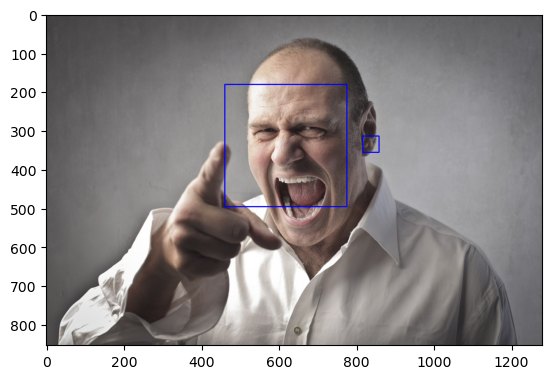

In [91]:
plt.imshow(cv2.cvtColor(test_image,cv2.COLOR_BGR2RGB))

1/1 [==============================] - 0s 40ms/step
4


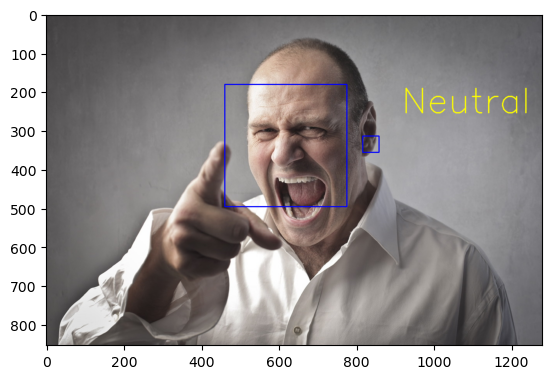

In [92]:
cropped_img= np.expand_dims(np.expand_dims(cv2.resize(roi_color, (48, 48)), -1), 0)
emotion_prediction = model.predict(cropped_img)
maxindex = int(np.argmax(emotion_prediction))
print(maxindex)
test_image_result=cv2.putText(test_image, emotion_dict[maxindex], (x+100, y-60), cv2.FONT_HERSHEY_SIMPLEX, 3, (0, 255, 255), 2, cv2.LINE_AA)
plt.imshow(cv2.cvtColor(test_image_result,cv2.COLOR_BGR2RGB))